In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('input.txt', 'r') as f:
    lines = f.read().splitlines()

# Convert input into a numpy array
positions = np.vstack([list(line) for line in lines])

In [2]:
positions

array([['.', '.', '.', ..., '.', 'O', '.'],
       ['.', '.', 'O', ..., 'O', '.', 'O'],
       ['.', '#', 'O', ..., '.', '#', '.'],
       ...,
       ['.', '.', '#', ..., 'O', 'O', 'O'],
       ['.', '.', 'O', ..., '.', '#', 'O'],
       ['.', '.', 'O', ..., 'O', '.', '#']], dtype='<U1')

In [3]:
# Numbers of rows and columns
R, C = positions.shape

# Part 1

In [4]:
# We modify the array, so make a copy
positions_p1 = positions.copy()

# Loop through columns
for i in range(C):

    if '#' in positions_p1[:,i]:

        # Get the indices of the hashes in this column
        hash_locs = np.where(positions_p1[:,i] == '#')[0]

        # Since the hashes don't move, we consider the elements in between each
        # pair of hashes. We use the sorted function to move all the Os to the
        # appropriate place.
        previous_hash_loc = 0
        for hash_loc in hash_locs:
            positions_p1[:,i][previous_hash_loc:hash_loc] = sorted(
                positions_p1[:,i][previous_hash_loc:hash_loc], reverse=True
                )
            previous_hash_loc = hash_loc + 1
        positions_p1[:,i][previous_hash_loc:] = sorted(
            positions_p1[:,i][previous_hash_loc:], reverse=True
            )
    else:
        positions_p1[:,i] = sorted(positions_p1[:,i], reverse=True)

In [5]:
# Calculate the load
load = 0
for i, row in enumerate(positions_p1):
    n_rocks = np.sum(row == 'O')
    load += n_rocks * (R - i)

print(load)

105623


# Part 2

In [6]:
positions_p2 = positions.copy()

n_cycles = 1000000000

# We can't repeat the process for this number of cycles. First, try a reduced 
# number of cycles
reduced_cycles = 500

In [7]:
# Store the load after each cycle to see if there's a pattern
load_list = []

for _ in range(reduced_cycles):

    # We use the same method as in part one, taking rows when tilting west and
    # east, and columns when tilting north and south.

    # Tilt north
    for i in range(C):
        if '#' in positions_p2[:,i]:
            hash_locs = np.where(positions_p2[:,i] == '#')[0]
            previous_hash_loc = 0
            for hash_loc in hash_locs:
                positions_p2[:,i][previous_hash_loc:hash_loc] = sorted(
                    positions_p2[:,i][previous_hash_loc:hash_loc], reverse=True
                    )
                previous_hash_loc = hash_loc + 1
            positions_p2[:,i][previous_hash_loc:] = sorted(
                positions_p2[:,i][previous_hash_loc:], reverse=True
                )
        else:
            positions_p2[:,i] = sorted(positions_p2[:,i], reverse=True)

    # Tilt west
    for i in range(R):
        if '#' in positions_p2[i,:]:
            hash_locs = np.where(positions_p2[i,:] == '#')[0]
            previous_hash_loc = 0
            for hash_loc in hash_locs:
                positions_p2[i,:][previous_hash_loc:hash_loc] = sorted(
                    positions_p2[i,:][previous_hash_loc:hash_loc], reverse=True
                    )
                previous_hash_loc = hash_loc + 1
            positions_p2[i,:][previous_hash_loc:] = sorted(
                positions_p2[i,:][previous_hash_loc:], reverse=True
                )
        else:
            positions_p2[i,:] = sorted(positions_p2[i,:], reverse=True)

    # Tilt south
    for i in range(C):
        if '#' in positions_p2[:,i]:
            hash_locs = np.where(positions_p2[:,i] == '#')[0]
            previous_hash_loc = 0
            for hash_loc in hash_locs:
                positions_p2[:,i][previous_hash_loc:hash_loc] = sorted(
                    positions_p2[:,i][previous_hash_loc:hash_loc])
                previous_hash_loc = hash_loc + 1
            positions_p2[:,i][previous_hash_loc:] = sorted(
                positions_p2[:,i][previous_hash_loc:])
        else:
            positions_p2[:,i] = sorted(positions_p2[:,i])

    # Tilt east
    for i in range(R):
        if '#' in positions_p2[i,:]:
            hash_locs = np.where(positions_p2[i,:] == '#')[0]
            previous_hash_loc = 0
            for hash_loc in hash_locs:
                positions_p2[i,:][previous_hash_loc:hash_loc] = sorted(
                    positions_p2[i,:][previous_hash_loc:hash_loc])
                previous_hash_loc = hash_loc + 1
            positions_p2[i,:][previous_hash_loc:] = sorted(
                positions_p2[i,:][previous_hash_loc:])
        else:
            positions_p2[i,:] = sorted(positions_p2[i,:])

    load = 0
    for i, row in enumerate(positions_p2):
        n_rocks = np.sum(row == 'O')
        load += n_rocks * (R - i)

    load_list.append(load)

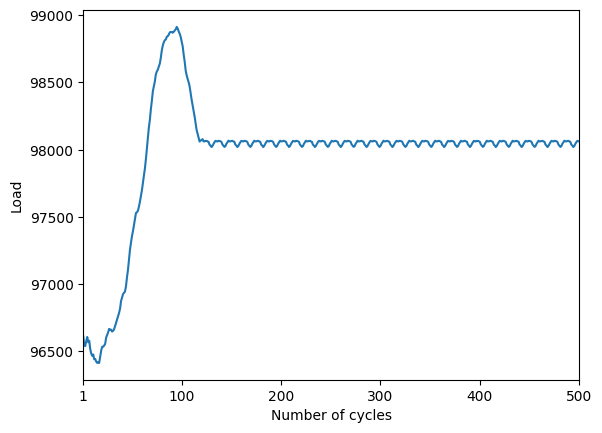

In [8]:
fig, ax = plt.subplots()

ax.plot(range(1, reduced_cycles+1), load_list)

ax.set_xlabel('Number of cycles')
ax.set_ylabel('Load')

ax.set_xticks([1] + list(range(100, 501, 100)))

_ = ax.set_xlim(1, reduced_cycles)

We see that after some number of cycles the system starts to repeat. This means we can work out the load after any large number of cycles by finding where it lies in the repeating pattern.

In [9]:
# Remove the "burn-in" cycles 
n_burn_in = 200

In [10]:
# As a reference, get the index of the first minimum after the number of 
# burn-in samples
min_index = np.argmin(load_list[n_burn_in:])

# Get the period by finding the index of the next minimum after the first
period = np.argmin(load_list[n_burn_in:][min_index+1:]) + 1

In [11]:
load_list[n_burn_in:][50] == load_list[n_burn_in:][50+period]

True

In [12]:
load_pattern = load_list[n_burn_in:n_burn_in+period]

(98016.65, 98068.35)

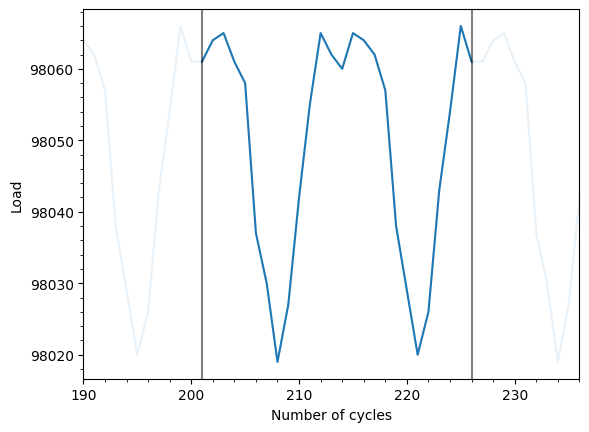

In [13]:
fig, ax = plt.subplots()

ax.plot(range(n_burn_in+1, n_burn_in+period+1), load_pattern)

ylim = ax.get_ylim()

ax.plot(range(1, reduced_cycles+1), load_list, c='C0', alpha=0.1)

ax.set_xlabel('Number of cycles')
ax.set_ylabel('Load')

ax.axvline(n_burn_in+1, c='k', alpha=0.5)
ax.axvline(n_burn_in+period, c='k', alpha=0.5)

ax.minorticks_on()

ax.set_xlim(n_burn_in - 10, n_burn_in + period + 10)
ax.set_ylim(ylim)

In [14]:
# The load after n_cycles is given by
print(load_pattern[(n_cycles-n_burn_in-1)%period])

98029
